In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [24]:
# loading 'IRIS.csv' as dataframe

iris = pd.read_csv("./IRIS.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [25]:
# describing dataframe

iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
# getting dataframe info

iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [27]:
# frequency distribution of species

iris_outcome = pd.crosstab(index=iris["species"], columns="count")
iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [28]:
# locating data

iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

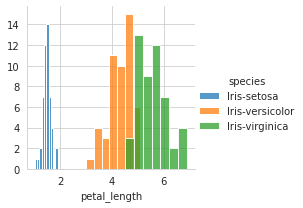

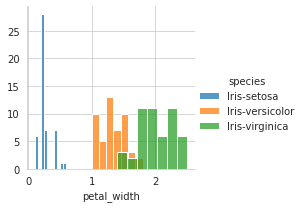

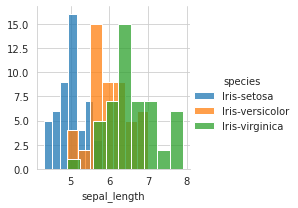

In [29]:
# distribution plots

sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"sepal_length").add_legend()

plt.show()

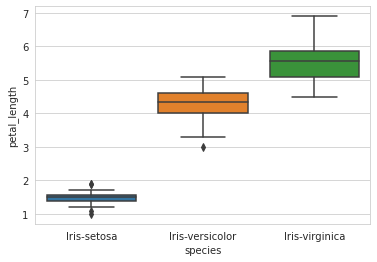

In [30]:
# box plot

sns.boxplot(x="species",y="petal_length",data=iris)

plt.show()

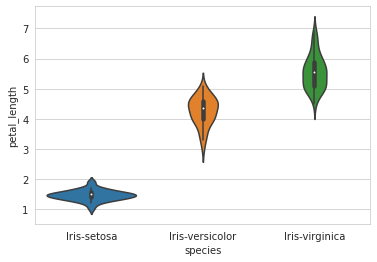

In [31]:
# violin plot

sns.violinplot(x="species",y="petal_length",data=iris)

plt.show()

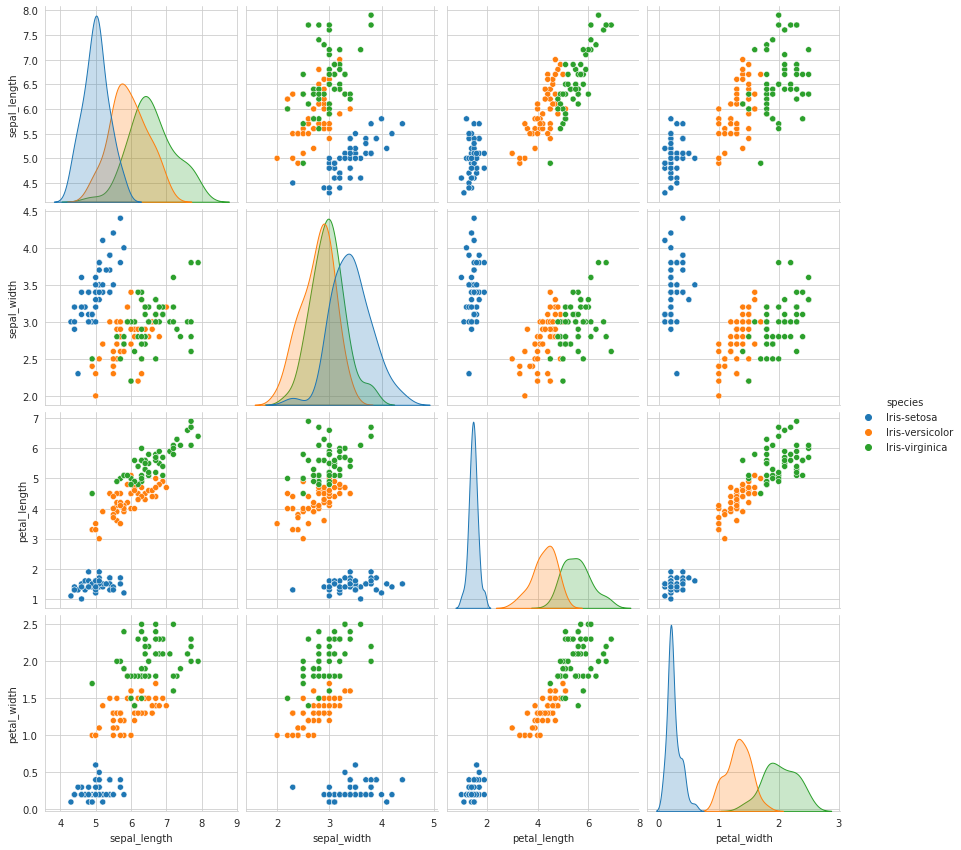

In [32]:
# scatter plot of each charateristic in pair

sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3)

plt.show()

In [33]:
#Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

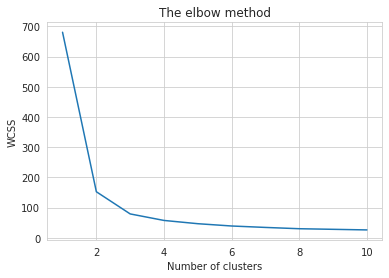

In [34]:
# elbow method

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

> According to the graph above, the optimal number of clusters is **3** (using the elbow method).

In [35]:
# implementing k-means clustering

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


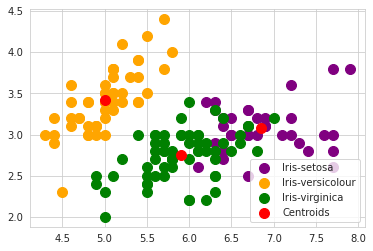

In [36]:
# plotting various clusters using scatterplot

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

For n_clusters = 3 The average silhouette_score is : 0.5525919445499757


Text(0, 0.5, 'sepal_width')

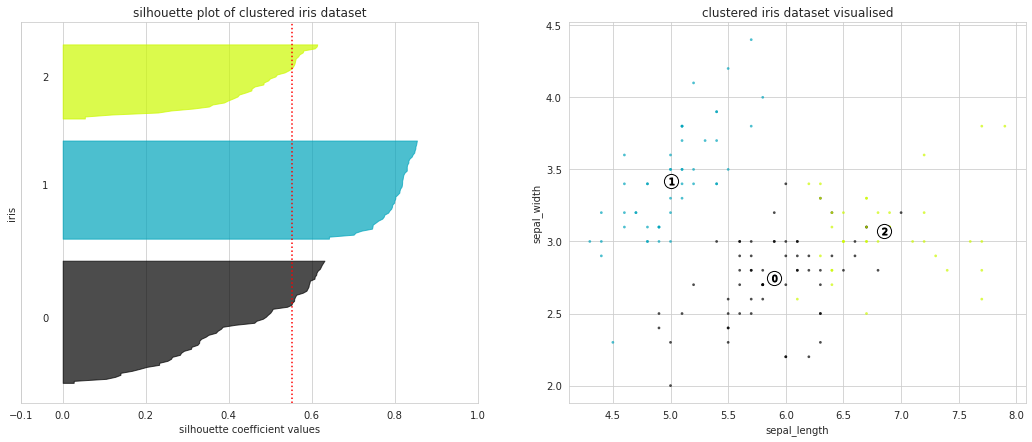

In [37]:
# silhouette method

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

n_clusters = 3

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

clusterer = KMeans(n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(x)

silhouette_avg = silhouette_score(x, cluster_labels)
print("For n_clusters =", n_clusters,
    "The average silhouette_score is :", silhouette_avg)

sample_silhouette_values = silhouette_samples(x, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10 

ax1.set_title("silhouette plot of clustered iris dataset")
ax1.set_xlabel("silhouette coefficient values")
ax1.set_ylabel("iris")

ax1.axvline(x=silhouette_avg, color="red", linestyle=":")

ax1.set_yticks([]) 
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

centers = clusterer.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("clustered iris dataset visualised")
ax2.set_xlabel("sepal_length")
ax2.set_ylabel("sepal_width")
